In [3]:
import zipfile
zip_ref = zipfile.ZipFile(r'C:\Users\moham\Desktop\archive.zip', 'r')
zip_ref.extractall('/archive')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators  -- used for processing large amt of data in batches by dividing the data (image_dataset_from_directory is the generator function name) 
#REf: https://keras.io/api/data_loading/image/

train_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\moham\Desktop\archive\input\train', # copy the path of train data by right clicking the train folder
    labels='inferred', # class a will be assigned 0 and class b will be assigned 1; in this case, cat label is 0 and dog label is 1
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)


Found 2448 files belonging to 2 classes.


In [8]:
test12_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\moham\Desktop\archive\input\test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)   # images are stored as numpy array

Found 610 files belonging to 2 classes.


In [10]:
# Normalize  (bringing the pixel values between 0 and 1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process) 
test12_ds = test12_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



In [12]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

history = model.fit(train_ds,epochs=10,validation_data=test12_ds)


Epoch 1/10
77/77 [==============================] - 93s 1s/step - loss: 0.6934 - accuracy: 0.4975 - val_loss: 0.6870 - val_accuracy: 0.5377
Epoch 2/10
77/77 [==============================] - 88s 1s/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6850 - val_accuracy: 0.6328
Epoch 3/10
77/77 [==============================] - 90s 1s/step - loss: 0.6932 - accuracy: 0.4804 - val_loss: 0.6854 - val_accuracy: 0.6492
Epoch 4/10
77/77 [==============================] - 96s 1s/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6855 - val_accuracy: 0.6377
Epoch 5/10
77/77 [==============================] - 87s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6854 - val_accuracy: 0.6393
Epoch 6/10
77/77 [==============================] - 86s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6857 - val_accuracy: 0.6377
Epoch 7/10
77/77 [==============================] - 85s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6862 - val_accuracy: 0.6279
Epoch 8/10
77/77 [==

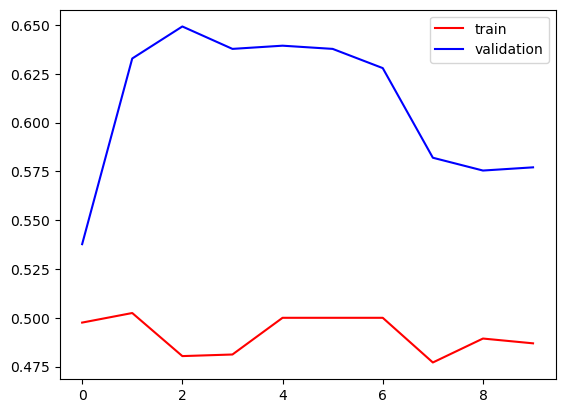

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


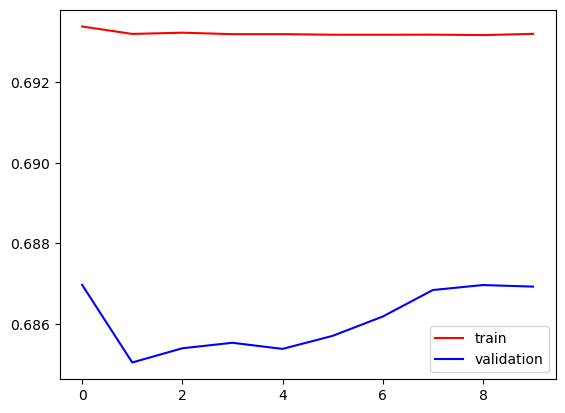

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


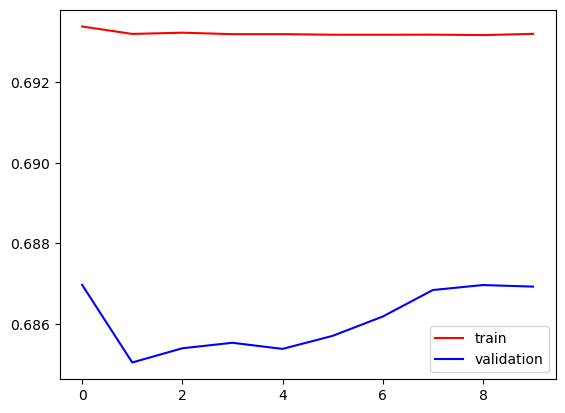

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step
[[0]]


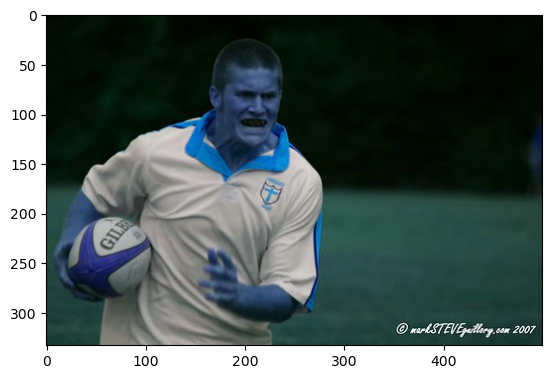

In [26]:
import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread(r'C:\Users\moham\Desktop\archive\input\test\rugby\rugby.1,260.jpg')

plt.imshow(test_img)

test_img.shape

test_img = cv2.resize(test_img, (256, 256))

test_input = test_img.reshape((1, 256, 256, 3))

output = model.predict(test_input)
output_int = output.astype(int)

print(output_int)


1/1 [==============================] - 0s 32ms/step


array([[0.9999753]], dtype=float32)

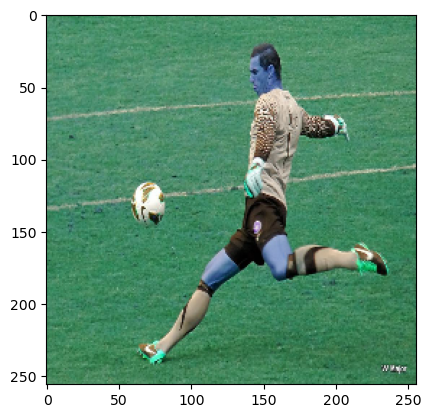

In [30]:
test_img = cv2.imread(r'C:\Users\moham\Desktop\archive\input\test\soccer\rugby.1,233.jpg')

test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels
plt.imshow(test_img)
model.predict(test_input)  # 0 refering to cat and 1 refering to dog

